In [2]:
# Credits: https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
# LSTM for sequence classification in the IMDB dataset
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)


In [3]:
#Refer: https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [4]:
print(X_train[1])
print(type(X_train[1]))
print(len(X_train[1]))
print(set(y_train))

[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 2, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 2, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 2, 2, 349, 2637, 148, 605, 2, 2, 15, 123, 125, 68, 2, 2, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 2, 5, 2, 656, 245, 2350, 5, 4, 2, 131, 152, 491, 18, 2, 32, 2, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
<class 'list'>
189
{0, 1}


In [5]:
print(numpy.amax(X_train))
print(numpy.amin(X_train))


[1, 4987, 468, 8, 30, 6, 87, 291, 18, 2, 2, 2, 18, 1825, 5, 14, 31, 2352, 11, 73, 60, 151, 12, 9, 44, 4, 2970, 19, 3484, 3026, 4, 1163, 9, 40, 6, 1984, 418, 39, 4, 162, 2, 2316, 237, 4, 22, 778, 19, 4, 2, 23, 44, 513, 1511, 7, 15, 3413, 4, 64, 155, 1032, 9, 4, 973, 93, 6, 171, 153, 303, 1024, 2592, 5, 2, 2, 62, 28, 77, 404, 190, 103, 2, 25, 586, 28, 69, 2, 2400, 11, 141, 6, 3495, 1597, 4, 185, 5, 307, 2, 185, 11, 49, 2, 5, 2, 2, 42, 6, 604, 7, 2, 2621, 8, 6, 3026, 4969, 23, 1878, 60, 48, 25, 124, 164, 44, 3026, 25, 203, 131, 181, 8, 808, 46, 6, 1281, 463, 7, 363, 2006]
[1, 2, 2, 2, 2, 2, 1930, 503, 2, 33, 372, 9, 40, 1930, 3363, 2, 33, 328, 84, 549, 45, 433, 377, 4, 503, 681, 1025, 4, 3363, 681, 9, 4, 64, 2, 2881, 15, 9, 131, 3445, 23, 6, 2933, 2857, 19, 567, 503, 2, 9, 4, 236, 155, 372, 842, 159, 36, 26, 3540, 3607, 42, 2024, 14, 232, 9, 2, 567, 34, 2, 772, 4, 1101, 7, 567, 934, 40, 29, 203, 30, 6, 992, 232, 269, 8, 1108, 34, 255, 2, 38, 15, 29, 80, 481, 40, 6, 2, 5, 89, 44, 32, 4, 27

In [6]:
max(list(map(lambda x:len(x), X_train)))

2494

In [7]:
# truncate and/or pad input sequences
max_review_length = 600
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

print(X_train.shape)
print(X_train[1])

(25000, 600)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

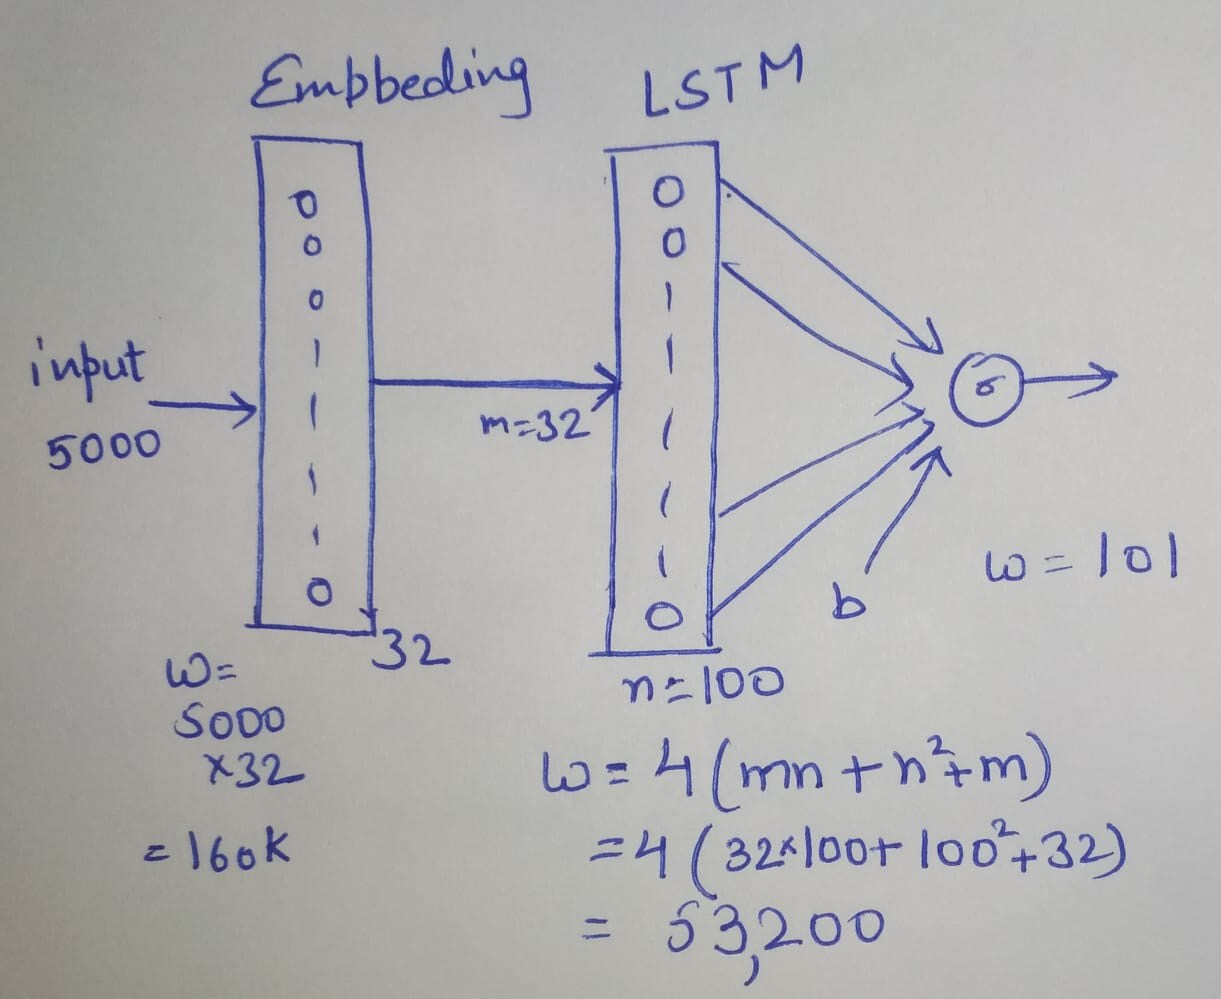

In [7]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 600, 32)           160000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
model.fit(X_train, y_train, epochs=10, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
391/391 [==============================] - 15s 30ms/step - loss: 0.5801 - accuracy: 0.6854
Epoch 2/10
391/391 [==============================] - 12s 30ms/step - loss: 0.2828 - accuracy: 0.8891
Epoch 3/10
391/391 [==============================] - 12s 30ms/step - loss: 0.2658 - accuracy: 0.8896
Epoch 4/10
391/391 [==============================] - 12s 30ms/step - loss: 0.2054 - accuracy: 0.9241
Epoch 5/10
391/391 [==============================] - 12s 30ms/step - loss: 0.1828 - accuracy: 0.9315
Epoch 6/10
391/391 [==============================] - 12s 30ms/step - loss: 0.1749 - accuracy: 0.9346
Epoch 7/10
391/391 [==============================] - 12s 30ms/step - loss: 0.1457 - accuracy: 0.9469
Epoch 8/10
391/391 [==============================] - 12s 30ms/step - loss: 0.1348 - accuracy: 0.9525
Epoch 9/10
391/391 [==============================] - 12s 30ms/step - loss: 0.1321 - accuracy: 0.9508
Epoch 10/10
391/391 [==============================] - 12s 30ms/step - loss: 0.095